# Calculating GDP per Capita for US counties in 2019
Ravi Shankar
March 1, 2022


# Importing County data

The excel file was downloaded [here](), and then every column but the GDP in 2019 was dropped, along with the county/state names


In [145]:
import pandas as pd

#This imports the Real Gross Domestic Product*, by U.S. County, 2017–2020 in
#Thousands of chained (2012) dollars
# *Real means inflation adjusted

# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows',10)

#GDP Data Frame
GDPDF = pd.read_csv(r'CountyGDP.csv')
GDPDF

,Unnamed: 0,2019
0,United States,"19,032,672,000"
1,NaN,NaN
2,Alabama,"203,383,898"
3,Autauga,"1,540,762"
4,Baldwin,"7,134,734"
...,...,...
3217,Washakie,"349,686"
3218,Weston,"322,576"
3219,"1. On January 2, 2019, two new county equivale...",NaN
3220,2. Virginia combination areas consist of one o...,NaN


# Importing County Population

The excel file was downloaded [here](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-counties-total.html), and then every column but the Population estimate in 2019 was dropped, along with the county/state names.


Now we do some data cleaning, removing NaNs. This drops 56 rows, making the file from 3222 rows to 3166 rows

In [146]:

#Drop NaN rows (spaces and footnotes)
GDPDF = GDPDF.dropna()

#Add Column Names
GDPDF.columns = ["CTYNAME", "GDP2019" ]

#Remove the first row "United States"
GDPDF = GDPDF.drop(0)

GDPDF = GDPDF.reset_index()


GDPDF

,index,CTYNAME,GDP2019
0,2,Alabama,"203,383,898"
1,3,Autauga,"1,540,762"
2,4,Baldwin,"7,134,734"
3,5,Barbour,"729,105"
4,6,Bibb,"380,453"
...,...,...,...
3160,3214,Sweetwater,"3,677,972"
3161,3215,Teton,"2,268,742"
3162,3216,Uinta,"881,052"
3163,3217,Washakie,"349,686"


# Importing County Population

The excel file was downloaded [here](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-counties-total.html), and then every column but the Population estimate in 2019 was dropped, along with the county/state names.


In [147]:
import pandas as pd



#Population Data Frame
popDF = pd.read_csv(r'CountyPopulation.csv')

popDF

,STATE,COUNTY,CTYNAME,POPESTIMATE2019
0,1,0,Alabama,4907965
1,1,1,Autauga County,55769
2,1,3,Baldwin County,223565
3,1,5,Barbour County,24657
4,1,7,Bibb County,22313
...,...,...,...,...
3189,56,37,Sweetwater County,42917
3190,56,39,Teton County,23385
3191,56,41,Uinta County,20196
3192,56,43,Washakie County,7824


Now we do some data cleaning. There are 3194 rows in the population data and only 3166 in the 

In [148]:

#Remove state and county FIPS code for now
popDF = popDF[["CTYNAME", "POPESTIMATE2019"]]

popDF

,CTYNAME,POPESTIMATE2019
0,Alabama,4907965
1,Autauga County,55769
2,Baldwin County,223565
3,Barbour County,24657
4,Bibb County,22313
...,...,...
3189,Sweetwater County,42917
3190,Teton County,23385
3191,Uinta County,20196
3192,Washakie County,7824


# Remove State Names



In [149]:
#import numpy as np
from numpy import loadtxt

#read text file into NumPy array
#data = loadtxt('my_data.txt')

# Join County Population and GDP Data


In [150]:
#GDP per Capita Data Frame = GDP_per_cap_DF
GDP_per_cap_DF = pd.concat([GDPDF,popDF], axis=1)



# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows',10)

GDP_per_cap_DF



,index,CTYNAME,GDP2019,CTYNAME,POPESTIMATE2019
0,2.0,Alabama,"203,383,898",Alabama,4907965
1,3.0,Autauga,"1,540,762",Autauga County,55769
2,4.0,Baldwin,"7,134,734",Baldwin County,223565
3,5.0,Barbour,"729,105",Barbour County,24657
4,6.0,Bibb,"380,453",Bibb County,22313
...,...,...,...,...,...
3189,NaN,NaN,NaN,Sweetwater County,42917
3190,NaN,NaN,NaN,Teton County,23385
3191,NaN,NaN,NaN,Uinta County,20196
3192,NaN,NaN,NaN,Washakie County,7824


They don't match up perfectly so we have to edit them down now:

In [151]:
# EDIT manually  the data to get them to match


# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows',10)

GDPDF

,index,CTYNAME,GDP2019
0,2,Alabama,"203,383,898"
1,3,Autauga,"1,540,762"
2,4,Baldwin,"7,134,734"
3,5,Barbour,"729,105"
4,6,Bibb,"380,453"
...,...,...,...
3160,3214,Sweetwater,"3,677,972"
3161,3215,Teton,"2,268,742"
3162,3216,Uinta,"881,052"
3163,3217,Washakie,"349,686"


They don't match up perfectly so we have to edit them down now.

Some counties are different in the populations data from the population and GDP data. 

For instance, the GDP data combines counties, such as:

County|GDP|County|Population
---|---|---|---|
Charlottesville+Ablemarle|GDP|Charlottesville|Population|
---|---|Ablemarle|Population|

When this happens, we will split up the pooled GDP, and average the GDP among the parts. 

We will do this instead of merging the populations (which is easier) because each county/city has a FIPS code, and that is what will be used eventually to plot the data (I assume, when I used tableau I to graph county data I 


So we will export that to a CSV file, edit it as an excel file, and return it back when the counties line up!

I don't know if this can be done automatically but, this is what I can do

In [152]:
GDP_per_cap_DF.to_csv("US_Counties_GDP_per_Capita_to_fix.csv")

# Summary of changes:

### GDP by County
- Delete Chugach Census Area1 ( no data)
- Delete Copper River Census Area1 ( no data)
- Delete Valdez-Cordova Census Area1 ( no corresponding data)
- Separated and Averaged the GDP of agglomerated ~30 Virginia counties
    - e.g. Charlottesville + albemarle county had a GDP of 10B, now Charlottesville, Ablemarle each have a GDP of 5B

### Population by County
- Delete Chugach Census Area1 ( no corresponding data)
- Delete Copper River Census Area1 ( no corresponding data)
- District of Columbia (repeat)
- Merge (Kalawao and Maui, Kalawao has population of 82 and no FIPS code)



# Import data after external data manipulation

As you can see, there are no NaNs or gaps in this data, now to calculate GDP per capita..

In [153]:
GDP_per_cap_DF = pd.read_csv(r'US_Counties_GDP_per_Capita_fixed.csv')
    
GDP_per_cap_DF

,CTYNAME,GDP2019,CTYNAME.1,POPESTIMATE2019
0,Alabama,203383898.0,Alabama,4907965
1,Autauga,1540762.0,Autauga County,55769
2,Baldwin,7134734.0,Baldwin County,223565
3,Barbour,729105.0,Barbour County,24657
4,Bibb,380453.0,Bibb County,22313
...,...,...,...,...
3185,Sweetwater,3677972.0,Sweetwater County,42917
3186,Teton,2268742.0,Teton County,23385
3187,Uinta,881052.0,Uinta County,20196
3188,Washakie,349686.0,Washakie County,7824


In [154]:
#convert GDP and population to GDP per capita, multiply by 1000 to make it dollars
GDP_per_cap_DF["GDP_per_cap" ] = 1000 * GDP_per_cap_DF["GDP2019" ] / GDP_per_cap_DF["POPESTIMATE2019" ]

GDP_per_cap_DF


,CTYNAME,GDP2019,CTYNAME.1,POPESTIMATE2019,GDP_per_cap
0,Alabama,203383898.0,Alabama,4907965,41439.557536
1,Autauga,1540762.0,Autauga County,55769,27627.570873
2,Baldwin,7134734.0,Baldwin County,223565,31913.465882
3,Barbour,729105.0,Barbour County,24657,29569.899014
4,Bibb,380453.0,Bibb County,22313,17050.732757
...,...,...,...,...,...
3185,Sweetwater,3677972.0,Sweetwater County,42917,85699.652818
3186,Teton,2268742.0,Teton County,23385,97016.976694
3187,Uinta,881052.0,Uinta County,20196,43625.074272
3188,Washakie,349686.0,Washakie County,7824,44694.018405


We Got the GDP/capita working! Let's do some EDA!

Mean GDP/capita of all counties:  73561.71
Median GDP/capita of all countries:  38126.17

Left Whisker :  -8997.912035664762
Q1 quantile of GDP/capita :  27628.48383138619
Q3 quantile of GDP/capita :  52046.081076086826
Right Whisker :  88672.47694313778


8136.916577594544

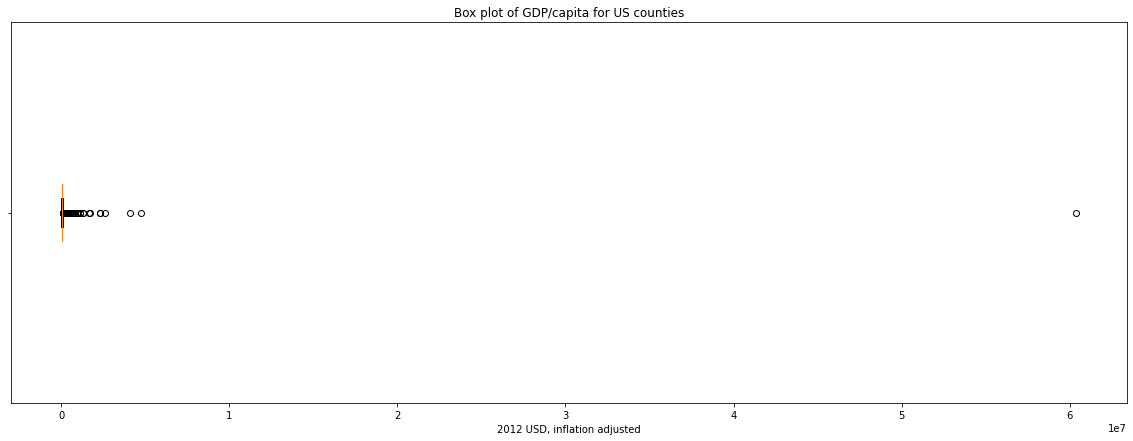

In [155]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

#ref: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
# Creating dataset, data = GDP per capita for 3189 US counties
data = GDP_per_cap_DF["GDP_per_cap" ] 

fig = plt.figure(figsize =(20, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance (horizontal box plot)
bp = ax.boxplot(data, vert = 0)

# x-axis labels
ax.set_yticklabels([''])
ax.set_xlabel('2012 USD, inflation adjusted')
    
# Adding title
plt.title("Box plot of GDP/capita for US counties")

mean_GDP = np.mean(data)
median_GDP = np.median(data)

print("Mean GDP/capita of all counties: ", round(mean_GDP,2))
print("Median GDP/capita of all countries: ", round(median_GDP,2))
print()

#Whiskers are calculated as Q1 - 1.5*IQR or Q3 + 1.5*IQR (see matplotlib documentation)
IQR = np.quantile(data, .75) - np.quantile(data, .25)
print("Left Whisker : ", np.quantile(data, .25)- 1.5*IQR)
print("Q1 quantile of GDP/capita : ", np.quantile(data, .25)) 
print("Q3 quantile of GDP/capita : ", np.quantile(data, .75)) 
print("Right Whisker : ", np.quantile(data, .75)+ 1.5*IQR)

np.quantile(data,0)

Is that right? There is a huge outlier at over 6million dollars GDP/capita. Lets check out what it is....

In [156]:
maxPerCap = max(GDP_per_cap_DF["GDP_per_cap" ])-1
GDP_per_cap_DF[GDP_per_cap_DF["GDP_per_cap" ] >maxPerCap]

,CTYNAME,GDP2019,CTYNAME.1,POPESTIMATE2019,GDP_per_cap
2714,Loving,9962411.0,Loving County,165,6.037825e+07


Mean GDP/capita of all counties:  54651.49
Median GDP/capita of all countries:  38115.5

Left Whisker :  -8972.58803582155
Q1 quantile of GDP/capita :  27627.57087270706
Q3 quantile of GDP/capita :  52027.67681172613
Right Whisker :  88627.83572025475


8136.916577594544

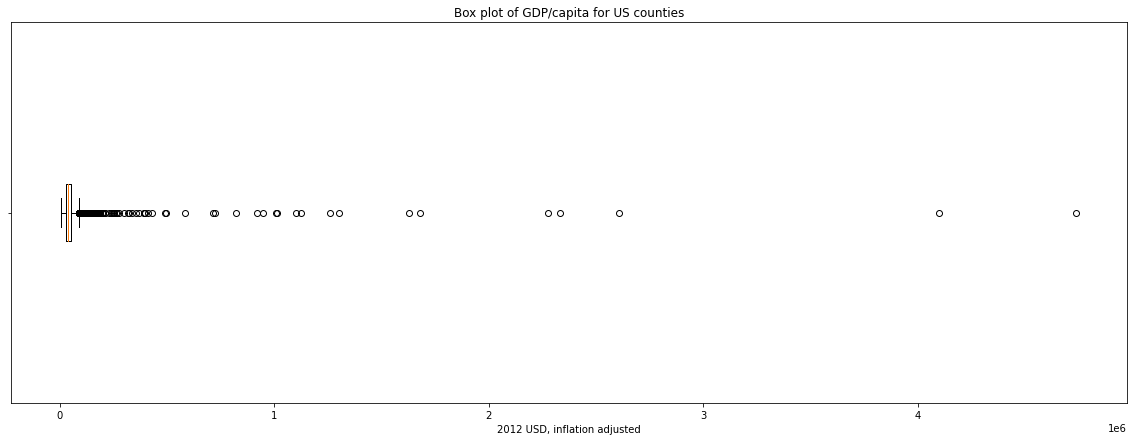

In [157]:
GDPpC = GDP_per_cap_DF[GDP_per_cap_DF["GDP_per_cap" ] <maxPerCap]

data = GDPpC["GDP_per_cap" ]

fig = plt.figure(figsize =(20, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance (horizontal box plot)
bp = ax.boxplot(data, vert = 0)

# x-axis labels
ax.set_yticklabels([''])
ax.set_xlabel('2012 USD, inflation adjusted')
    
# Adding title
plt.title("Box plot of GDP/capita for US counties")

mean_GDP = np.mean(data)
median_GDP = np.median(data)

print("Mean GDP/capita of all counties: ", round(mean_GDP,2))
print("Median GDP/capita of all countries: ", round(median_GDP,2))
print()

#Whiskers are calculated as Q1 - 1.5*IQR or Q3 + 1.5*IQR (see matplotlib documentation)
IQR = np.quantile(data, .75) - np.quantile(data, .25)
print("Left Whisker : ", np.quantile(data, .25)- 1.5*IQR)
print("Q1 quantile of GDP/capita : ", np.quantile(data, .25)) 
print("Q3 quantile of GDP/capita : ", np.quantile(data, .75)) 
print("Right Whisker : ", np.quantile(data, .75)+ 1.5*IQR)

np.quantile(data,0)

# Results

Turns out the outlier is "Loving County, Texas", which is the smallest county by population in the united states. I don't know how its GDP is so high, but good for them.

When we remove Loving County, the data is still very right skewed, although the mean GDP/capita for a US county comes down from from ```$74,000 to $55,000```

**Median GDP/capita for a US county: $38,115.5**

Let's put it out to a CSV to use elsewhere

In [158]:
GDP_per_cap_DF.to_csv("US_Counties_GDP_per_Capita.csv")